<a href="https://colab.research.google.com/github/Swapnil0506/Heart_Disease_Prediction/blob/main/HeartDiseasePrediction_IA_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# NOTEBOOK IMPORTS #

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
import matplotlib.mlab as mlab
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from imblearn.combine import SMOTETomek
from sklearn.preprocessing import StandardScaler
import pickle
%matplotlib inline

from google.colab import files
heartExcelData = files.upload()
heartDataSet = pd.read_csv('framingham.csv')
heartDataSet.drop(['education'],axis=1,inplace=True)
heartDataSet.rename(columns={'male':'Sex_male'},inplace=True)
heartDataSet.head()

/usr/local/lib/python3.7/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)


Saving framingham.csv to framingham.csv


,Sex_male,age,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


# CHECKING FOR NULL VALUES #

In [ ]:
heartDataSet.isnull().sum()

Sex_male             0
age                  0
currentSmoker        0
cigsPerDay          29
BPMeds              53
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             50
sysBP                0
diaBP                0
BMI                 19
heartRate            1
glucose            388
TenYearCHD           0
dtype: int64

In [ ]:
count=0
for i in heartDataSet.isnull().sum(axis=1):
    if i>0:
        count=count+1
print('Total number of rows with missing values is ', count)
print('since it is only',round((count/len(heartDataSet.index))*100), 'percent of the entire dataset the rows with missing values are excluded.')

Total number of rows with missing values is  489
since it is only 12 percent of the entire dataset the rows with missing values are excluded.


In [ ]:
# Dropping the null values present in our dataset
heartDataSet.dropna(axis=0,inplace=True)

In [ ]:
heartDataSet.isnull().sum()

Sex_male           0
age                0
currentSmoker      0
cigsPerDay         0
BPMeds             0
prevalentStroke    0
prevalentHyp       0
diabetes           0
totChol            0
sysBP              0
diaBP              0
BMI                0
heartRate          0
glucose            0
TenYearCHD         0
dtype: int64

# ANALYZING DATA #

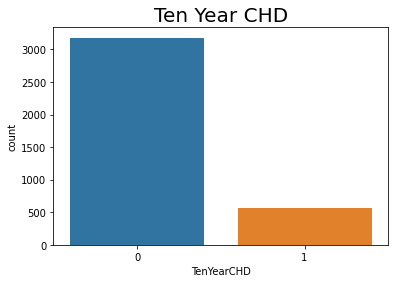

In [ ]:
sns.countplot(x='TenYearCHD', data = heartDataSet)
plt.title('Ten Year CHD',fontsize=20)

plt.show()

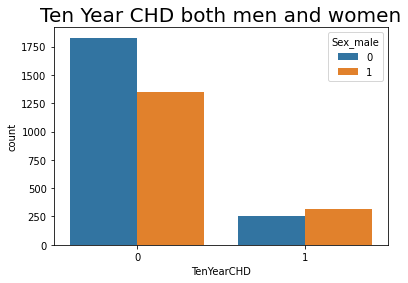

In [ ]:
sns.countplot(x='TenYearCHD',hue='Sex_male', data = heartDataSet)
plt.title('Ten Year CHD both men and women',fontsize=20)

plt.show()

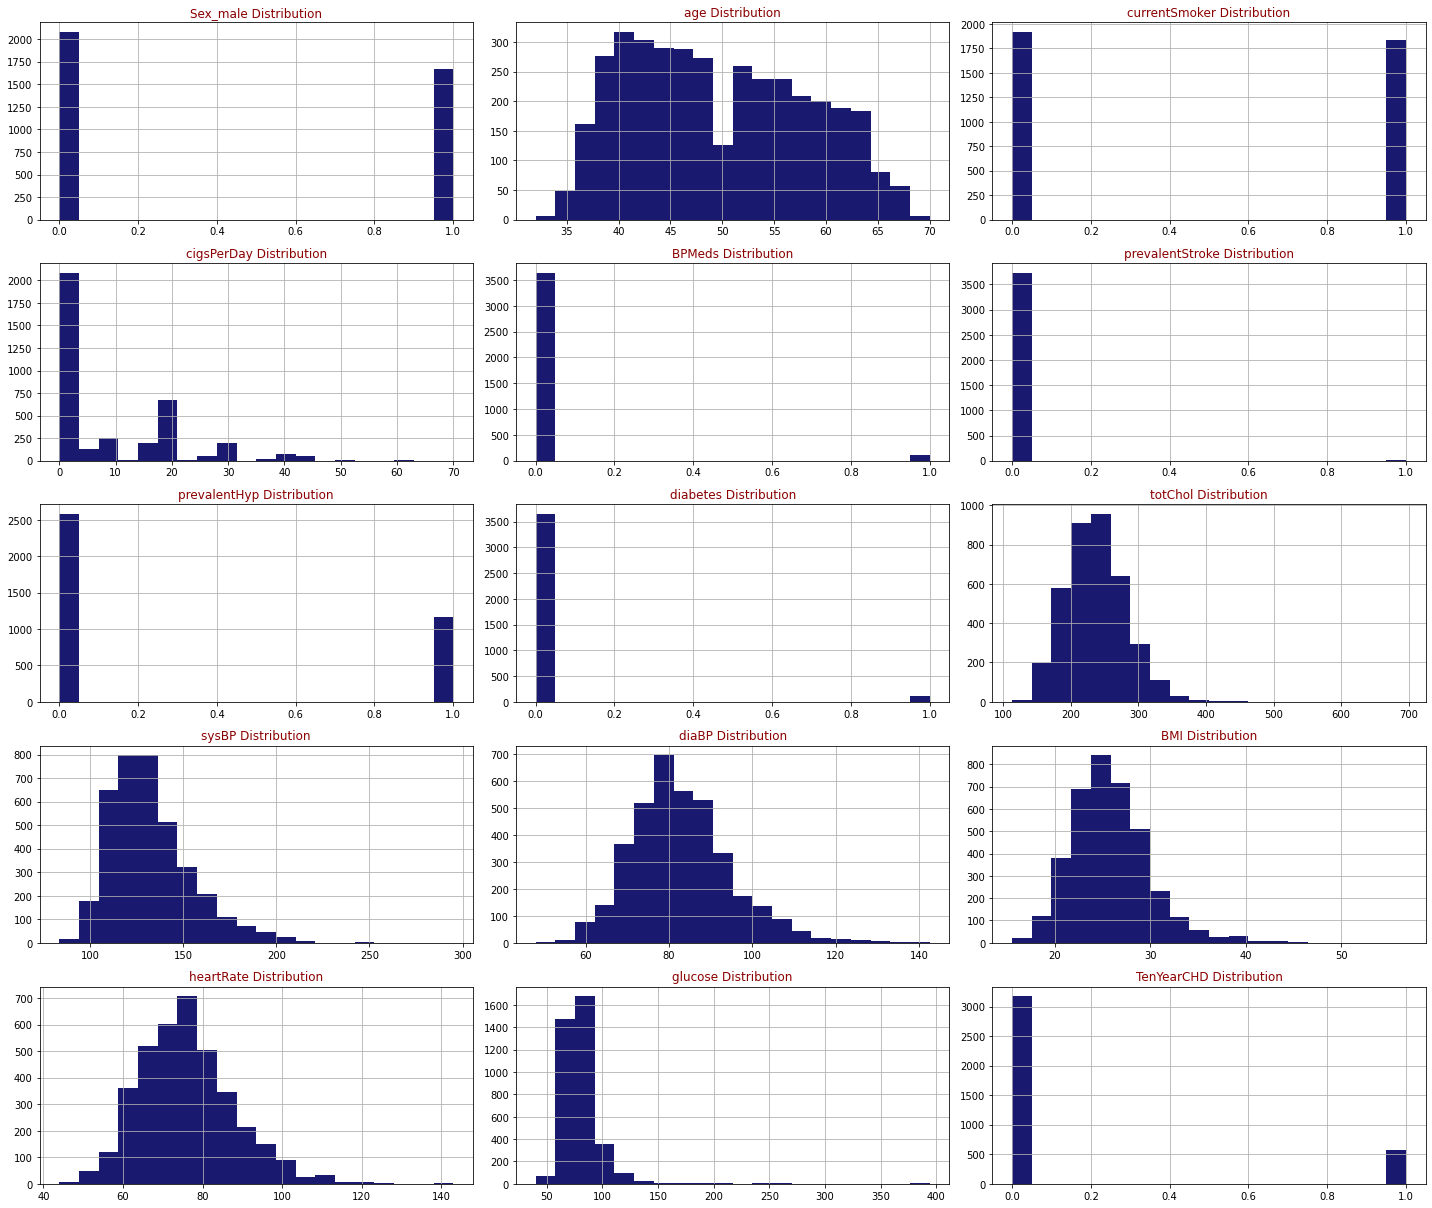

In [ ]:
def draw_histograms(dataframe, features, rows, cols):
    fig=plt.figure(figsize=(20,20))
    for i, feature in enumerate(features):
        ax=fig.add_subplot(rows,cols,i+1)
        dataframe[feature].hist(bins=20,ax=ax,facecolor='midnightblue')
        ax.set_title(feature+" Distribution",color='DarkRed')
        
    fig.tight_layout()  
    plt.show()
draw_histograms(heartDataSet,heartDataSet.columns,6,3)

# SPLITTING DATASET INTO TRAINING AND TEST SET #

In [ ]:
X = heartDataSet.drop('TenYearCHD', axis=1)
y = heartDataSet['TenYearCHD']

smk = SMOTETomek(random_state=42)
X_res, Y_res = smk.fit_sample(X,y)

print(X_res.shape)
print(Y_res.shape)

X_train, X_test, y_train, y_test = train_test_split(X_res,Y_res,test_size = 0.3, random_state = 10)

(6314, 14)
(6314,)


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


# FEATURE SCALING #

In [ ]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

# TRAINING THE LOGISTIC REGRESSION MODEL ON THE TRAINING SET

In [ ]:
logisticModel = LogisticRegression(solver='lbfgs', max_iter=5000)
logisticModel.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=5000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

# MAKING THE CONFUSION MATRIX

In [ ]:
Predictions = logisticModel.predict(X_test)

In [ ]:
cm = confusion_matrix(y_test,Predictions)
print(cm)
accuracy_score(y_test, Predictions)

[[619 352]
 [276 648]]


0.6686015831134564

# PREDICTING TEST SET RESULTS

In [ ]:
Predictions = logisticModel.predict(X_test)
classification_report(y_test, Predictions)

'              precision    recall  f1-score   support\n\n           0       0.69      0.64      0.66       971\n           1       0.65      0.70      0.67       924\n\n    accuracy                           0.67      1895\n   macro avg       0.67      0.67      0.67      1895\nweighted avg       0.67      0.67      0.67      1895\n'

# DETERMINING THE ACCURACY

In [ ]:
accuracy_score(y_test,Predictions)

0.6686015831134564

# PACKING THE MODEL IN A PICKLE FILE

In [ ]:
with open('ModelPickleFile','wb') as f:
  pickle.dump(logisticModel,f)

In [ ]:
myList = [[0,45,0,0,0,0,0,0,211,128,80,27,72,68]]
aray = np.array(myList)
print(type(aray))
df = pd.DataFrame(aray, columns = ['Sex_male','age','currentSmoker','cigsPerDay','BPMeds','prevalentStroke','prevalentHyp','diabetes','totChol','sysBP','diaBP','BMI','heartRate','glucose'])
print(type(df))
myNew = logisticModel.predict(df)
print(myNew)

<class 'numpy.ndarray'>
<class 'pandas.core.frame.DataFrame'>
[1]
